**Classification Using Artificial Neural Networks with Hyperparameter Tuning on Alphabets Data**

**Overview**

In this assignment, you will be tasked with developing a classification model using Artificial Neural Networks (ANNs) to classify data points from the "Alphabets_data.csv" dataset into predefined categories of alphabets. This exercise aims to deepen your understanding of ANNs and the significant role hyperparameter tuning plays in enhancing model performance.

**1. Data Exploration and Preprocessing**

* Begin by loading and exploring the "Alphabets_data.csv" dataset. Summarize its key features such as the number of samples, features, and classes.
* Execute necessary data preprocessing steps including data normalization, managing missing values.

In [1]:
# Load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
# Load the dataset
alpabets_df = pd.read_csv('/content/Alphabets_data.csv')

In [3]:
# Show initial few rows of the input dataset
alpabets_df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
# Basic info like dtype, number of rows
alpabets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [5]:
# Check for unique entries
count01 = alpabets_df['letter'].unique()
len(count01)

26

In [6]:
# Check for missing or NA or Null entries
alpabets_df.isna().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


No missing data in the loaded dataset.

In [7]:
# Check for duplicates
alpabets_df[alpabets_df.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


There appears to be a lot (1332 rows among 2000 rows) duplicates, which is about 67%. Therefore, dropping them will affect the quantity of data and can also affect the model. Moreover, having multiple entries need not always mean duplicates, like several customers buying a same product. Hence, for this dataset, i am assuming there are no duplicates.  

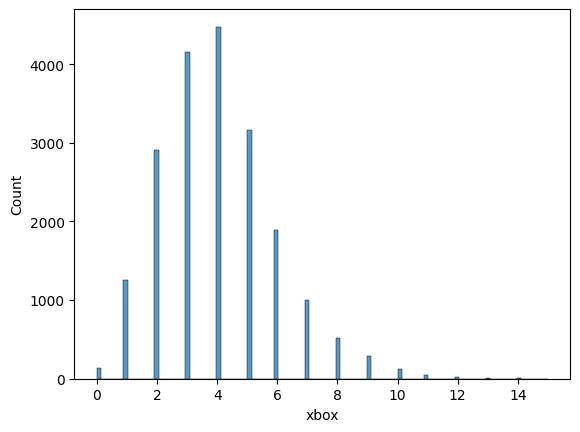

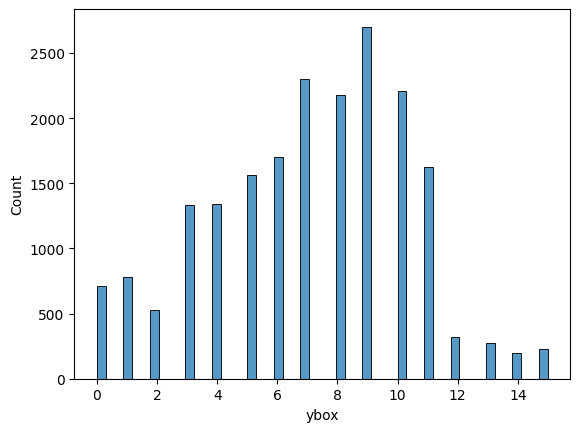

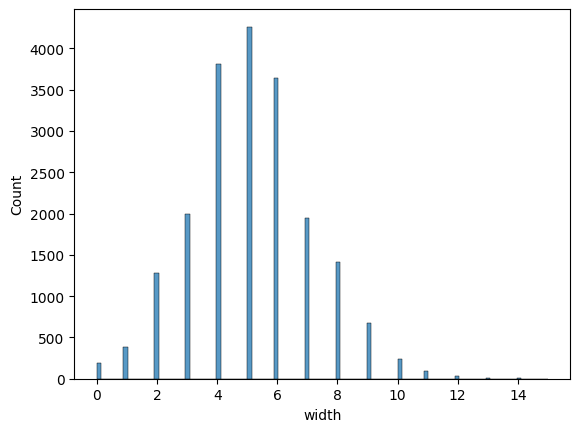

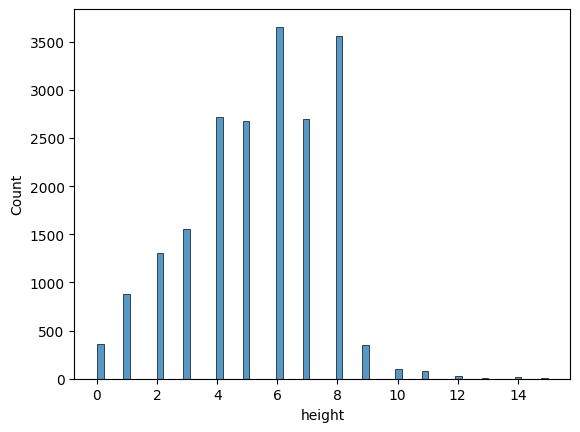

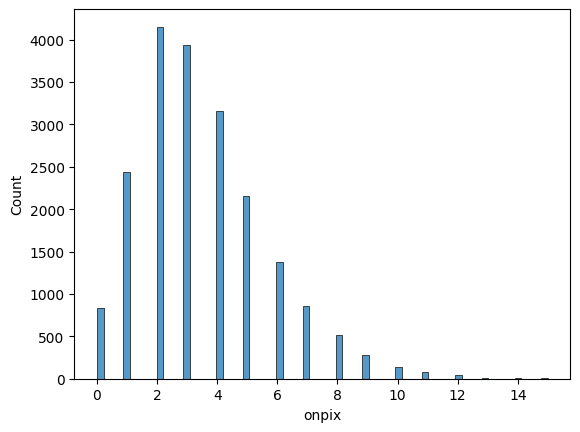

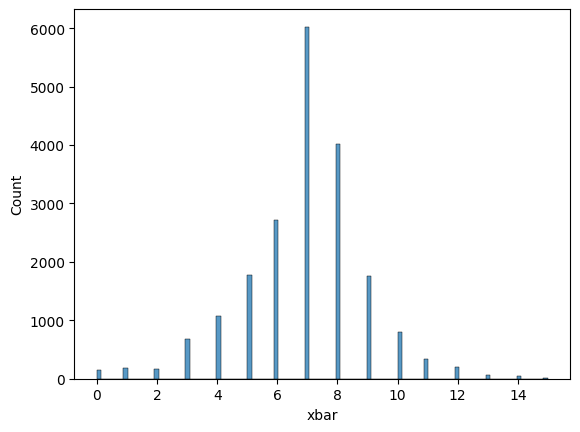

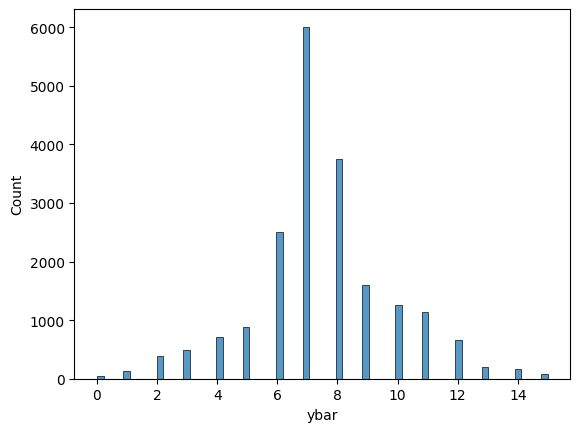

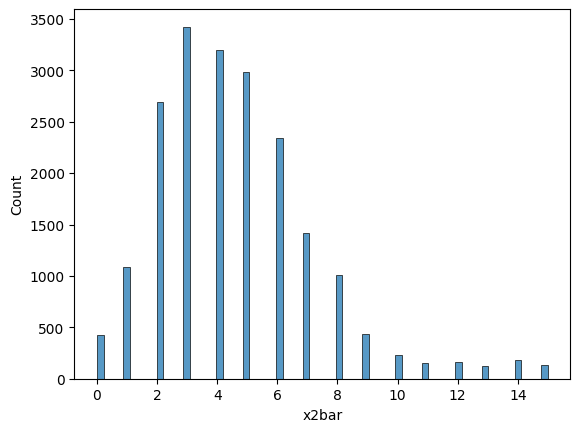

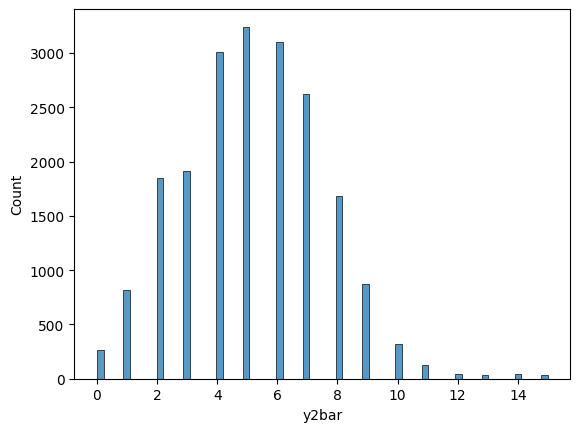

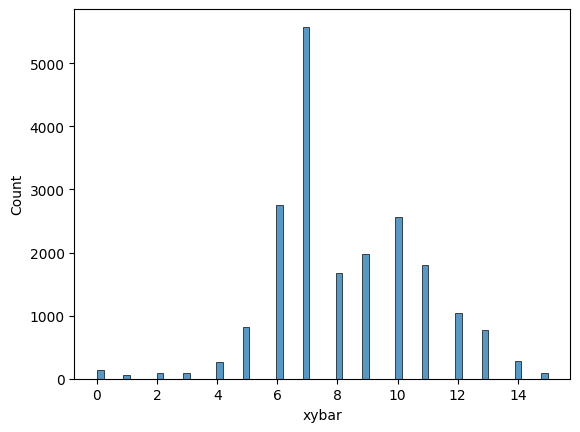

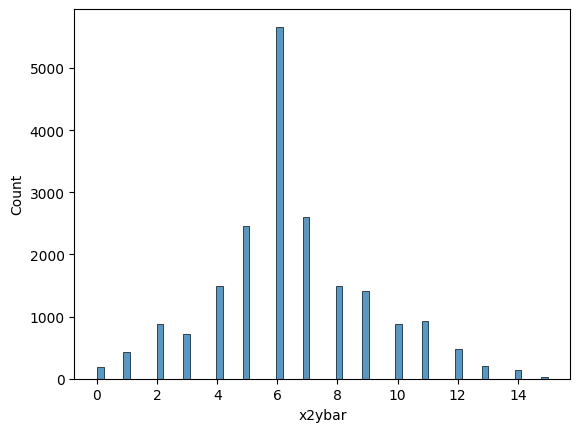

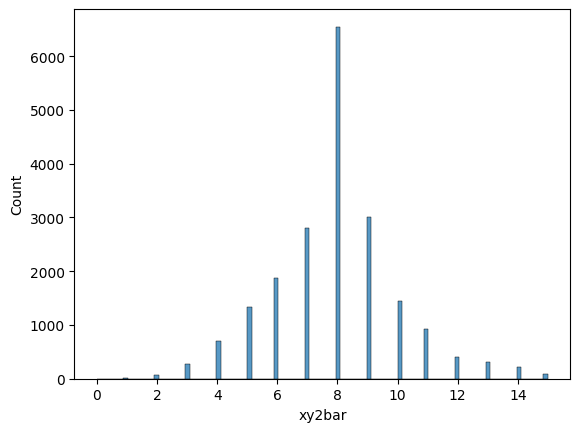

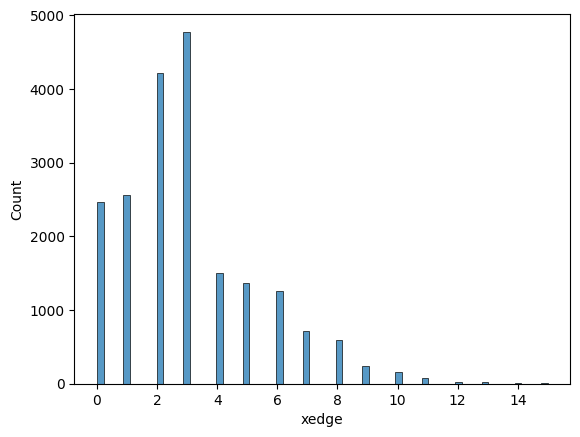

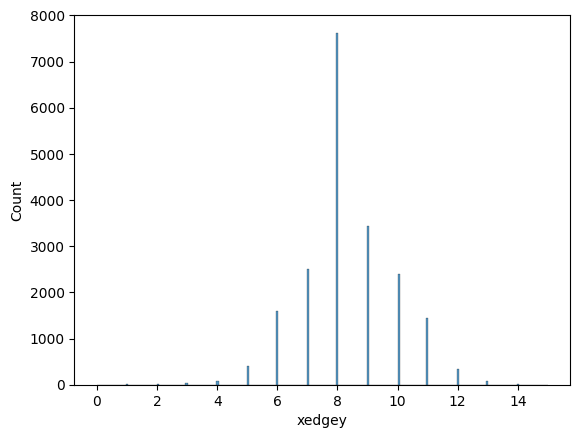

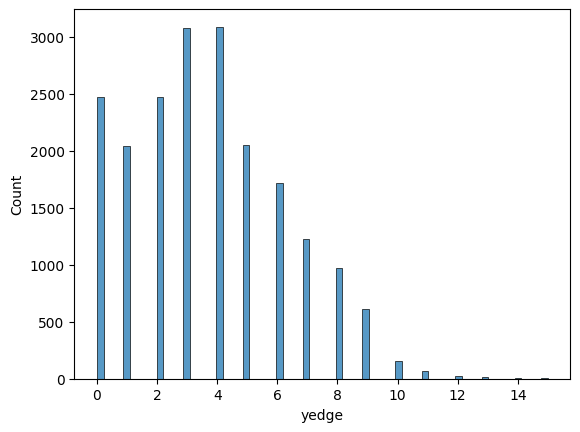

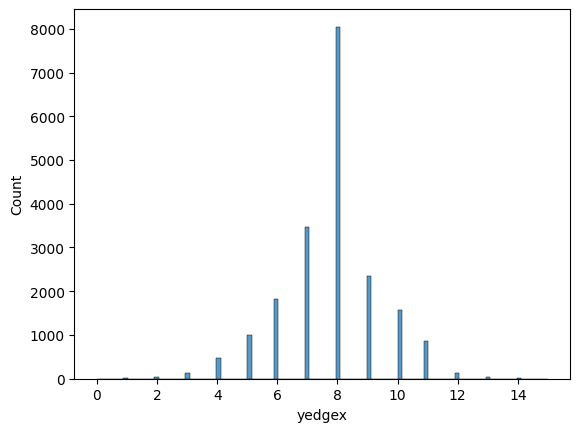

In [8]:
for c in alpabets_df.columns:
  if c != 'letter':
    sea.histplot(alpabets_df[c], kde = False)
    plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
std_scaler = StandardScaler()
x_data = std_scaler.fit_transform(alpabets_df.drop('letter', axis = 1))
x_data.shape

(20000, 16)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [12]:
# Converting 'letter' categorical data to numerical using LabelEncoder
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(alpabets_df['letter'])
y_data

array([19,  8,  3, ..., 19, 18,  0])

In [13]:
# Convert Numerical data (integers) to OneHot vectors
y_data_encoded = to_categorical(y_data)
y_data_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

**2. Model Implementation**
  * Construct a basic ANN model using your chosen high-level neural network library. Ensure your model includes at least one hidden layer.
  * Divide the dataset into training and test sets.
  * Train your model on the training set and then use it to make predictions on the test set.

In [14]:
# Building an ANN model with 3 layers (2 Hidden and one output)
model01 = Sequential()
model01.add(Dense(64, input_dim = 16, activation = 'relu')) # 1st layer: 16 features (number of features in the input data) and 64 neurons
model01.add(Dense(8, activation = 'relu')) # 2nd layer: takes these 64 outputs from the 1st layer and has 8 neurons
model01.add(Dense(26, activation = 'softmax')) # One output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* activation: 'relu' is a function. It avoids vanishing gradients (helps deep networks train better) and allows the network to learn complex patterns (non-linearity).
* activation: 'softmax' is used because we have multiclass output (26 is the number of outputs (count of unique entries in 'letter' feature)). This is a output layer

In [15]:
# Summary of the ANN model01
model01.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │           234 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,842 (7.20 KB)

 Trainable params: 1,842 (7.20 KB)

 Non-trainable params: 0 (0.00 B)

* Number of Param: 1088 --> (Weights: (16 features x 64 neurons)  1024) + ((Biases) 64 (one per neuron)) --> 1024 + 64 = 1088 : Layer 1
* Number of Param: 520 --> Dimensions reduces from 64 to 8 --> (Weights: (64 x 8) 512) + ((Biases) 8 (one per neuron)) --> 512 + 8 = 520 : Layer 2
* Number of Param: 234 --> (Weights: (8 x 26) 208) + ((Biases) 26) --> 208 + 26 = 234
* Total Parameters: 1088 + 520 + 234 = 1842

In [16]:
model01.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
from sklearn.model_selection import train_test_split as tts

In [18]:
# Spliting the input data into training and testing datasets
x_train01, x_test01, y_train01, y_test01 = tts(x_data, y_data_encoded, test_size = 0.2, random_state = 42)

In [19]:
# Introducing further split 80:20 on the training data, where 20% of the training dataset is used for validation
history01 = model01.fit(x_train01, y_train01, epochs = 10, batch_size = 32, validation_split = 0.2, shuffle = False)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1168 - loss: 3.0162 - val_accuracy: 0.4797 - val_loss: 1.8305
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5351 - loss: 1.6254 - val_accuracy: 0.6506 - val_loss: 1.2549
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6625 - loss: 1.1737 - val_accuracy: 0.7131 - val_loss: 1.0098
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7248 - loss: 0.9611 - val_accuracy: 0.7456 - val_loss: 0.8945
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7452 - loss: 0.8567 - val_accuracy: 0.7606 - val_loss: 0.8259
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7616 - loss: 0.7913 - val_accuracy: 0.7744 - val_loss: 0.7784
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7749 - loss: 0.7442 - val_accuracy: 0.7822 - val_loss: 0.7411
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7835 - loss: 0.7072 - val_accuracy: 0.

* The validation dataset is useful to monitor overfitting during training of tuning the hyperparameters.
* It also means, that training data is much smaller and hence only valid when the input dataset is large.
* The output of the neural network model indicates that the accuracy of both training and validation datasets is steadily increasing and losses are reducing. Since they have not plateaued yet, the number of epochs can be more (for trial purposes). It is also important to note that the accuracy of the validation dataset is slightly lower than the accuracy of the training dataset, this may indicate marginal overfitting.

In [20]:
test_loss01, test_accuracy01 = model01.evaluate(x_test01, y_test01)
print(f'Test Loss: {test_loss01}, Test Accuracy: {test_accuracy01}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8160 - loss: 0.6353
Test Loss: 0.642010509967804, Test Accuracy: 0.8147500157356262


* It is interesting that the accuracy of the training dataset > test dataset, this can indicate slight overfitting
* Since test accuracy > validation accuracy, it can indicate, the validation data is an 'easier' dataset so the accuracy is higher compared to the test dataset.
* Additionally, it can also indicate data leakage, as the scaling and transformation of categorical data were done before splitting the dataset.

**Avoiding data leakage**

In [21]:
# Splitting dataset into test and train sets
x_data02 = alpabets_df.drop('letter', axis = 1)
y_data02 = alpabets_df['letter']
x_train02, x_test02, y_train02, y_test02 = tts(x_data02, y_data02, test_size = 0.2, random_state = 42)

In [22]:
x_train02

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
5894,4,7,5,5,4,6,7,3,7,11,8,9,3,8,4,8
3728,4,7,6,5,5,6,8,3,7,11,8,9,3,8,4,7
8958,3,5,4,3,3,7,8,5,5,7,7,6,5,9,2,6
7671,4,10,6,7,6,5,7,5,7,6,6,12,3,8,6,9
5999,4,10,6,8,4,8,11,2,3,4,10,9,3,11,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,5,11,4,6,3,7,7,4,3,9,6,7,3,10,8,7
11964,3,7,5,5,4,9,11,6,4,6,5,7,2,8,6,4
5390,3,4,6,3,2,9,6,2,8,10,3,7,2,7,3,9
860,3,8,4,6,2,7,8,0,8,14,6,6,0,8,1,7


In [23]:
# Encoding train and test datasets separately to avoid data leakage
y_train02_encoded = label_encoder.fit_transform(y_train02)
y_test02_encoded = label_encoder.transform(y_test02)

In [24]:
# Converting encoded numerical data to OneHot Vectors
y_train02_oh = to_categorical(y_train02_encoded)
y_test02_oh = to_categorical(y_test02_encoded)
# Converting numerical (integers) data to Scalars
x_train02_scalar = std_scaler.fit_transform(x_train02)
x_test02_scalar = std_scaler.transform(x_test02)
# never use fit_transform on test dataset, as this may cause data leakage.
# The fit method calulates the standard deviation and mean of the dataset and model is always suppose to calulate it using training data.
# If fit_transform is used on test data, then std and mean are calulated using test data and this can cause problems during model validation.

In [25]:
y_train02_oh

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
history01_01 = model01.fit(x_train02_scalar, y_train02_oh, epochs = 10, batch_size = 32, validation_split = 0.2, shuffle = False)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8083 - loss: 0.6262 - val_accuracy: 0.8106 - val_loss: 0.6435
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8141 - loss: 0.6056 - val_accuracy: 0.8163 - val_loss: 0.6250
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8200 - loss: 0.5861 - val_accuracy: 0.8209 - val_loss: 0.6085
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8265 - loss: 0.5683 - val_accuracy: 0.8263 - val_loss: 0.5935
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8323 - loss: 0.5518 - val_accuracy: 0.8341 - val_loss: 0.5802
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8370 - loss: 0.5365 - val_accuracy: 0.8378 - val_loss: 0.5673
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8408 - loss: 0.5222 - val_accuracy: 0.8391 - val_loss: 0.5553
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8443 - loss: 0.5084 - val_accuracy: 0.

In [27]:
test_loss01_01, test_accuracy01_01 = model01.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss01_01}, Test Accuracy: {test_accuracy01_01}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8495 - loss: 0.5080
Test Loss: 0.512445867061615, Test Accuracy: 0.8492500185966492


* Note: Epochs indicates how long to train the model with the given hyperparameters.
* 10 epochs does a resonably good job as the accuracy of train, test and validation datasets are in same range.
* Testing, how the metrics change with increasing number of epochs?

In [28]:
history01_02 = model01.fit(x_train02_scalar, y_train02_oh, epochs = 15, batch_size = 32, validation_split = 0.2, shuffle = False)

Epoch 1/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8592 - loss: 0.4715 - val_accuracy: 0.8503 - val_loss: 0.5155
Epoch 2/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8630 - loss: 0.4603 - val_accuracy: 0.8528 - val_loss: 0.5068
Epoch 3/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8676 - loss: 0.4498 - val_accuracy: 0.8553 - val_loss: 0.4979
Epoch 4/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8693 - loss: 0.4402 - val_accuracy: 0.8559 - val_loss: 0.4899
Epoch 5/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8717 - loss: 0.4312 - val_accuracy: 0.8581 - val_loss: 0.4819
Epoch 6/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8743 - loss: 0.4228 - val_accuracy: 0.8594 - val_loss: 0.4750
Epoch 7/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8768 - loss: 0.4148 - val_accuracy: 0.8609 - val_loss: 0.4684
Epoch 8/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8778 - loss: 0.4075 - val_accuracy: 0.

In [29]:
test_loss01_02, test_accuracy01_02 = model01.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss01_02}, Test Accuracy: {test_accuracy01_02}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.4282
Test Loss: 0.4273705780506134, Test Accuracy: 0.8732500076293945


* Note: The accuracy of the training dataset is highest, while it is nearly the same for the Validation and test datasets. This indicates a slight overfitting as training accuracy > test accuracy; as, the difference is < 5%.
* The optimal number of epochs is less than 5, as the train accuracy increases nominaly and loss reducution is also < 3%, the gap between validation accuracy and training started to increase.
* To further improve the model, hyperparameter tuning is required.
* The model01 does a good job as it generalizes well and the difference between train and test accuracy is also small.

**3. Hyperparameter Tuning**

* Modify various hyperparameters, such as the number of hidden layers, neurons per hidden layer, activation functions, and learning rate, to observe their impact on model performance.
* Adopt a structured approach like grid search or random search for hyperparameter tuning, documenting your methodology thoroughly.

In [30]:
# Hyperparameter tuning --> Case 01: Number of hidden layers
model11 = Sequential()
model11.add(Dense(64, input_dim = 16, activation = 'relu')) # 1st layer: 16 features (number of features in the input data) and 64 neurons
model11.add(Dense(32, activation = 'relu')) # 2nd layer: takes these 64 outputs from the 1st layer and has 32 neurons
model11.add(Dense(8, activation = 'relu')) # 3rd layer: takes these 32 outputs from the 2nd layer and has 16 neurons
model11.add(Dense(26, activation = 'softmax')) # One output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Telling the model how to learn, loss --> by measruing error, optimizer --> updating weights to minimize loss, metrics --> tracks accuracy during trining
model11.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [32]:
history11_01 = model11.fit(x_train02_scalar, y_train02_oh, epochs = 10, batch_size = 32, validation_split = 0.2, shuffle = False)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1438 - loss: 2.9310 - val_accuracy: 0.5013 - val_loss: 1.6829
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5650 - loss: 1.5077 - val_accuracy: 0.6616 - val_loss: 1.1634
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6862 - loss: 1.0974 - val_accuracy: 0.7166 - val_loss: 0.9708
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7268 - loss: 0.9210 - val_accuracy: 0.7453 - val_loss: 0.8551
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7637 - loss: 0.8071 - val_accuracy: 0.7681 - val_loss: 0.7717
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7869 - loss: 0.7257 - val_accuracy: 0.7825 - val_loss: 0.7121
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8046 - loss: 0.6638 - val_accuracy: 0.7987 - val_loss: 0.6635
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8174 - loss: 0.6138 - val_accuracy: 0.

In [33]:
test_loss11_01, test_accuracy11_01 = model11.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss11_01}, Test Accuracy: {test_accuracy11_01}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8268 - loss: 0.5603
Test Loss: 0.5679402947425842, Test Accuracy: 0.8259999752044678


* The accuracy is increasing with the number of epochs (how long it takes for the model to learn) while the loss is reducing. This is an indicator that the model may need more 'time' to learn; therefore, increasing the number of epochs is one option.

* The test accuracy and train accuracy are nearly the same. This model11_01 is a good model, but model01 does better as the loss% is low and accuracy% is higher comparatively.

In [34]:
history11_02 = model11.fit(x_train02_scalar, y_train02_oh, epochs = 20, batch_size = 32, validation_split = 0.2, shuffle = False)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8496 - loss: 0.5092 - val_accuracy: 0.8416 - val_loss: 0.5443
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8574 - loss: 0.4834 - val_accuracy: 0.8475 - val_loss: 0.5253
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8642 - loss: 0.4612 - val_accuracy: 0.8497 - val_loss: 0.5096
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8701 - loss: 0.4410 - val_accuracy: 0.8522 - val_loss: 0.4952
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8763 - loss: 0.4227 - val_accuracy: 0.8578 - val_loss: 0.4817
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8810 - loss: 0.4053 - val_accuracy: 0.8597 - val_loss: 0.4707
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8848 - loss: 0.3899 - val_accuracy: 0.8625 - val_loss: 0.4585
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8893 - loss: 0.3753 - val_accuracy: 0.

In [35]:
test_loss12, test_accuracy12 = model11.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss12}, Test Accuracy: {test_accuracy12}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8987 - loss: 0.3642
Test Loss: 0.3676114082336426, Test Accuracy: 0.893750011920929


* Increasing epochs from 10 to 20 yields a similar result. However, the gap between training and validation accuracy is a bit wider.

* This model11_02 is a slightly better model compared to model11_01, in terms of higher accuracies and lower losses, but the difference in validation accuracy and train accuracy is wider. This is an indication of overfitting.

* Overall, model11_01 is a better model compared to model11_02 as the model generalizes well.

**Case 01: More layers result in a marginally better model**

* Based on the accuracy values of the train, validation, and test datasets, it is evident that models (model11_01 and model11_02) with 3 hidden layers are better in comparison with model01 with 2 hidden layers.

* The model11_01 and model11_02 have better accuracy and lower loss, but at the cost of additional complexity has resulting in marginal better performance.

In [36]:
# Hyperparameters tuning --> Case 02_01: Increased neurons in the 1st hidden layer and changing the number neurons in the 2nd hidden layer
model12_01 = Sequential()
model12_01.add(Dense(128, input_dim = 16, activation = 'relu')) # 1st layer: 16 features (number of features in the input data) and 128 neurons
model12_01.add(Dense(64, activation = 'relu')) # 2nd layer: takes these 128 outputs from the 1st layer and has 64 neurons
model12_01.add(Dense(26, activation = 'softmax')) # One output layer

In [37]:
model12_01.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [38]:
history12_01 = model12_01.fit(x_train02_scalar, y_train02_oh, epochs = 10, batch_size = 32, validation_split = 0.2, shuffle = False)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3988 - loss: 2.2568 - val_accuracy: 0.7497 - val_loss: 0.9198
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7632 - loss: 0.8306 - val_accuracy: 0.8150 - val_loss: 0.6681
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8197 - loss: 0.6153 - val_accuracy: 0.8491 - val_loss: 0.5354
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8553 - loss: 0.4923 - val_accuracy: 0.8706 - val_loss: 0.4496
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8828 - loss: 0.4093 - val_accuracy: 0.8866 - val_loss: 0.3885
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8983 - loss: 0.3491 - val_accuracy: 0.8969 - val_loss: 0.3462
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9115 - loss: 0.3045 - val_accuracy: 0.9066 - val_loss: 0.3145
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9199 - loss: 0.2688 - val_accuracy: 0.

In [39]:
test_loss12_01, test_accuracy12_01 = model12_01.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss12_01}, Test Accuracy: {test_accuracy12_01}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9293 - loss: 0.2503
Test Loss: 0.25079259276390076, Test Accuracy: 0.9277499914169312


* The model12_01 with an increased number of neurons on the 1st and the 2nd hidden layers, shows that test accuracy is good and performs better in comparison with model01 and models 11.

In [40]:
# Hyperparameters tuning --> Case 02_02: Increased neurons in the 1st hidden layer and changing the number neurons in the 2nd hidden layer
model12_02 = Sequential()
model12_02.add(Dense(128, input_dim = 16, activation = 'relu')) # 1st layer: 16 features (number of features in the input data) and 64 neurons
model12_02.add(Dense(32, activation = 'relu')) # 2nd layer: takes these 64 outputs from the 1st layer and has 32 neurons
model12_02.add(Dense(26, activation = 'softmax')) # One output layer

In [41]:
model12_02.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [42]:
history12_02 = model12_02.fit(x_train02_scalar, y_train02_oh, epochs = 10, batch_size = 32, validation_split = 0.2, shuffle = False)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3636 - loss: 2.3616 - val_accuracy: 0.7197 - val_loss: 1.0638
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7313 - loss: 0.9552 - val_accuracy: 0.7747 - val_loss: 0.7813
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7924 - loss: 0.7176 - val_accuracy: 0.8188 - val_loss: 0.6393
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8275 - loss: 0.5869 - val_accuracy: 0.8456 - val_loss: 0.5477
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8525 - loss: 0.5007 - val_accuracy: 0.8619 - val_loss: 0.4824
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8715 - loss: 0.4367 - val_accuracy: 0.8763 - val_loss: 0.4338
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8870 - loss: 0.3872 - val_accuracy: 0.8831 - val_loss: 0.3973
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9004 - loss: 0.3472 - val_accuracy: 0.

In [43]:
test_loss12_02, test_accuracy12_02 = model12_02.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss12_02}, Test Accuracy: {test_accuracy12_02}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9094 - loss: 0.3031
Test Loss: 0.30936768651008606, Test Accuracy: 0.9104999899864197


* The model12_01 performs better than model12_02 as the accuracy is better and the losses are smaller.

* Both models 12' perform better than model01 and model11', in reference to accuracy and loss metrics.

* Reduction in the number of neurons in hidden layer 2 seems to make the models perform badly?  

In [44]:
# Hyperparameter tuning --> Case 02_03: Increased neurons in the 1st hidden layer and changing the number neurons in the 2nd hidden layer
model12_03 = Sequential()
model12_03.add(Dense(128, input_dim = 16, activation = 'relu')) # 1st layer: 16 features (number of features in the input data) and 128 neurons
model12_03.add(Dense(16, activation = 'relu')) # 2nd layer: takes these 128 outputs from the 1st layer and has 16 neurons
model12_03.add(Dense(26, activation = 'softmax')) # One output layer

In [45]:
model12_03.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [46]:
history12_03 = model12_03.fit(x_test02_scalar, y_test02_oh, epochs = 10, batch_size = 32, validation_split = 0.2, shuffle = False)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0981 - loss: 3.1057 - val_accuracy: 0.2800 - val_loss: 2.6027
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3570 - loss: 2.3630 - val_accuracy: 0.4825 - val_loss: 1.8498
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5611 - loss: 1.6677 - val_accuracy: 0.6300 - val_loss: 1.3950
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6623 - loss: 1.2806 - val_accuracy: 0.6750 - val_loss: 1.1625
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7161 - loss: 1.0740 - val_accuracy: 0.7113 - val_loss: 1.0341
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7514 - loss: 0.9494 - val_accuracy: 0.7387 - val_loss: 0.9515
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7648 - loss: 0.8629 - val_accuracy: 0.7513 - val_loss: 0.8920
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7754 - loss: 0.7985 - val_accuracy: 0.

In [47]:
test_loss12_03, test_accuracy12_03 = model12_03.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss12_03}, Test Accuracy: {test_accuracy12_03}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8092 - loss: 0.6653
Test Loss: 0.6816285848617554, Test Accuracy: 0.8067499995231628


* The model12_02 performs better than model12_03 in terms of test dataset accuracy and the gap between the accuracies of the training dataset and the testing dataset.

* There seems to be an inverse relation between accuracy and reducing number of neurons in the 2nd hidden layer.

In [48]:
# Hyperparameter tuning --> Case 02_04: Increased neurons in the 1st hidden layer and changing the number neurons in the 2nd hidden layer
model12_04 = Sequential()
model12_04.add(Dense(128, input_dim = 16, activation = 'relu')) # 1st layer: 16 features (number of features in the input data) and 64 neurons
model12_04.add(Dense(8, activation = 'relu')) # 2nd layer: takes these 64 outputs from the 1st layer and has 16 neurons
model12_04.add(Dense(26, activation = 'softmax')) # One output layer

In [49]:
model12_04.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [50]:
history12_04 = model12_04.fit(x_train02_scalar, y_train02_oh, epochs = 10, batch_size = 32, validation_split = 0.2, shuffle = False)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2005 - loss: 2.8544 - val_accuracy: 0.5559 - val_loss: 1.5566
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5864 - loss: 1.4212 - val_accuracy: 0.6687 - val_loss: 1.1513
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6883 - loss: 1.0918 - val_accuracy: 0.7337 - val_loss: 0.9613
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7407 - loss: 0.9167 - val_accuracy: 0.7650 - val_loss: 0.8440
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7705 - loss: 0.8073 - val_accuracy: 0.7841 - val_loss: 0.7646
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7914 - loss: 0.7318 - val_accuracy: 0.8012 - val_loss: 0.7061
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8062 - loss: 0.6746 - val_accuracy: 0.8109 - val_loss: 0.6600
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8225 - loss: 0.6293 - val_accuracy: 0.

In [51]:
test_loss12_04, test_accuracy12_04 = model12_04.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss12_04}, Test Accuracy: {test_accuracy12_04}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8443 - loss: 0.5384
Test Loss: 0.5517877340316772, Test Accuracy: 0.8475000262260437


**Case 02: Increased neurons in the 1st hidden layer and changing the number of neurons in the 2nd hidden layer improved the model performance**

* The model12_03 is worse than the model12_04, as the accuracy is lower.

* Comparing the model01 with 64 neurons in the 1st hidden layer and 8 in the 2nd hidden layer with model12_04 with 128 neurons in the 1st hidden layer and 8 in the 2nd hidden layer, the model01 performs much better in all metrics like loss and accuracy.

* Overall, the model12_01 remains the best model, with 128 neurons in the 1st hidden layer and 64 neurons in the 2nd hidden layer, when comparing two hidden-layer models.

Text(0.5, 1.0, 'Case 02: Number of Neurons')

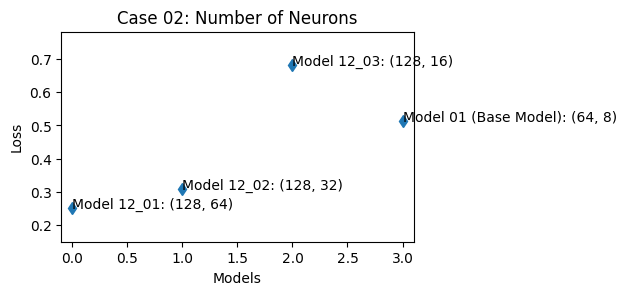

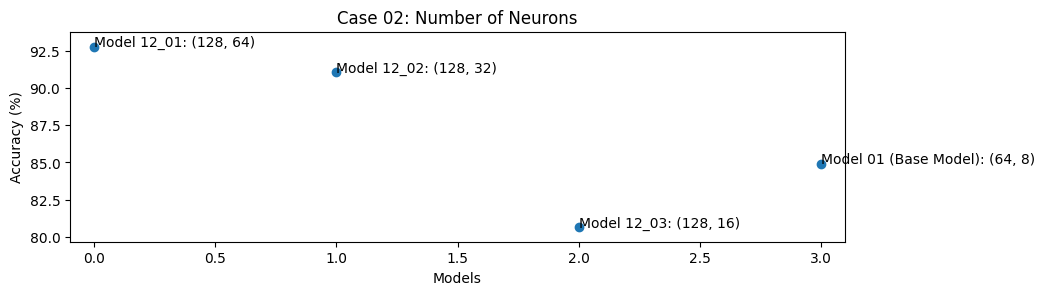

In [52]:
# Visulaize loss and accuracy of different models (Test datasets): Case wise with 10 epochs
# Case 02 --> Number of Neurons (2 hidden layers): (128, 64), (128, 32), (128, 16), (64, 8)
Case_02_labels = ['Model 12_01: (128, 64)', 'Model 12_02: (128, 32)', 'Model 12_03: (128, 16)', 'Model 01 (Base Model): (64, 8)']
Case_02_loss = [test_loss12_01, test_loss12_02, test_loss12_03, test_loss01_01]
Case_02_accuracy = [test_accuracy12_01*100, test_accuracy12_02*100, test_accuracy12_03*100, test_accuracy01_01*100]

fig01 = plt.figure(figsize = (10, 6))
ax01 = fig01.add_subplot(2, 2, 2)
ax01.plot(Case_02_loss, 'd', label = 'Case 02 : Loss')
for i, c02 in enumerate(Case_02_labels):
    plt.text(i, Case_02_loss[i], c02)
plt.xlabel('Models')
plt.ylabel('Loss')
plt.xlim(-0.1, 3.1)
plt.ylim(min(Case_02_loss)-0.1, max(Case_02_loss)+0.1)
plt.title('Case 02: Number of Neurons')

fig02 = plt.figure(figsize = (10, 6))
ax02 = fig02.add_subplot(2, 1, 1)
ax02.plot(Case_02_accuracy, 'o', label = 'Case 02 : Accuracy')
for i, c02 in enumerate(Case_02_labels):
    plt.text(i, Case_02_accuracy[i], c02)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.xlim(-0.1, 3.1)
plt.ylim(min(Case_02_accuracy)-1, max(Case_02_accuracy)+1)
plt.title('Case 02: Number of Neurons')

In [53]:
# Hyperparameters tuning --> Case 02: Introducing three hidden layers
# Best model (2 hidden layers) --> model12_01 (2 hidden layers with neurons 128, 64), Best model (3 hidden layers) --> model11_02 (3 hidden layers with neurons 64, 32, 8)
# Combining the features of these two good models
model12_05 = Sequential()
model12_05.add(Dense(128, input_dim = 16, activation = 'relu')) # 1st layer: 16 features (number of features in the input data) and 128 neurons
model12_05.add(Dense(64, activation = 'relu')) # 2nd layer: takes these 128 outputs from the 1st layer and has 64 (128/2) neurons
model12_05.add(Dense(16, activation = 'relu')) # 3rd layer: takes these 64 outputs from the 2nd layer and has 8 (64/4) neurons
model12_05.add(Dense(26, activation = 'softmax')) # One output layer

In [54]:
model12_05.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [55]:
history12_05 = model12_05.fit(x_train02_scalar, y_train02_oh, epochs = 10, batch_size = 32, validation_split = 0.2, shuffle = False)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2930 - loss: 2.4532 - val_accuracy: 0.7031 - val_loss: 1.0390
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7439 - loss: 0.9059 - val_accuracy: 0.7794 - val_loss: 0.7644
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8013 - loss: 0.6759 - val_accuracy: 0.8150 - val_loss: 0.6254
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8348 - loss: 0.5508 - val_accuracy: 0.8384 - val_loss: 0.5337
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8597 - loss: 0.4652 - val_accuracy: 0.8578 - val_loss: 0.4670
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8786 - loss: 0.4024 - val_accuracy: 0.8747 - val_loss: 0.4190
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8936 - loss: 0.3534 - val_accuracy: 0.8866 - val_loss: 0.3785
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9056 - loss: 0.3134 - val_accuracy: 0.

In [56]:
test_loss12_05, test_accuracy12_05 = model12_05.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss12_05}, Test Accuracy: {test_accuracy12_05}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9100 - loss: 0.2918
Test Loss: 0.2860720455646515, Test Accuracy: 0.9107499718666077


* Combining features from different models, like an increased number of neurons at each hidden layer and an increased (3 layers) number of layers resulted in a good model that can generalise well.

* This complex model12_05 performs better than the base model01' (2 hidden layers with fewer neurons: 64-8) and at par in comparision to model11' (3 hidden layers with fewer neurons: 64-32-8) and also similar to model12_01 and model12_02 (2 hidden layers with more neurons: 128-64, and 128-32).

* Overall, a relatively simple model12_01 performs the best (based on accuracy and loss metrics data) compared to this complex model12_05.

In [57]:
Case_01_loss = [test_loss11_01, test_loss12_04, test_loss01_01]
Case_01_accuracy = [test_accuracy11_01, test_accuracy12_04, test_accuracy01_01]
print(Case_01_loss)
print(Case_01_accuracy)

[0.5679402947425842, 0.5517877340316772, 0.512445867061615]
[0.8259999752044678, 0.8475000262260437, 0.8492500185966492]


Text(0.5, 1.0, 'Case 01: Number of hidden layers')

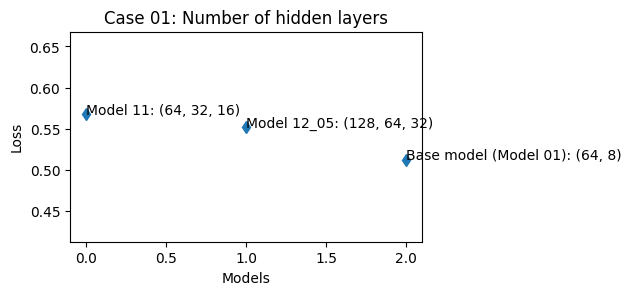

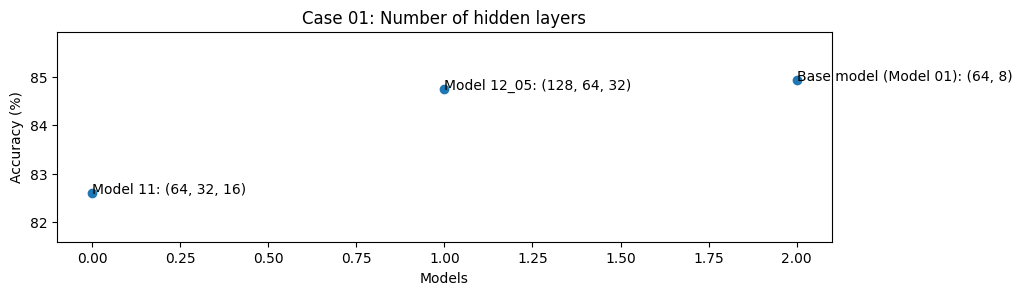

In [58]:
# Visulaize loss and accuracy of different models (Test datasets): Case wise with 10 epochs
# Case 01 --> Number of hidden layers (3 layers): (64, 32, 16), (128, 64, 32), and 2 layer base model (64, 8)
Case_01_labels = ['Model 11: (64, 32, 16)', 'Model 12_05: (128, 64, 32)', 'Base model (Model 01): (64, 8)']
Case_01_loss = [test_loss11_01, test_loss12_04, test_loss01_01]
Case_01_accuracy = [test_accuracy11_01*100, test_accuracy12_04*100, test_accuracy01_01*100]

fig01 = plt.figure(figsize = (10, 6))
ax01 = fig01.add_subplot(2, 2, 1)
ax01.plot(Case_01_loss, 'd', label = 'Case 01 : Loss')
for i, c01 in enumerate(Case_01_labels):
    plt.text(i, Case_01_loss[i], c01)
plt.xlabel('Models')
plt.ylabel('Loss')
plt.xlim(-0.1, 2.1)
plt.ylim(min(Case_01_loss)-0.1, max(Case_01_loss)+0.1)
plt.title('Case 01: Number of hidden layers')

fig02 = plt.figure(figsize = (10, 6))
ax02 = fig02.add_subplot(2, 1, 1)
ax02.plot(Case_01_accuracy, 'o', label = 'Case 01 : Accuracy')
for i, c01 in enumerate(Case_01_labels):
    plt.text(i, Case_01_accuracy[i], c01)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.xlim(-0.1, 2.1)
plt.ylim(min(Case_01_accuracy)-1, max(Case_01_accuracy)+1)
plt.title('Case 01: Number of hidden layers')

In [59]:
# Hyperparameters tuning --> Case 03_01: Activation functions
# The base model is the model01 with 2 hidden layers with 64 and 8 neurons in each
model13_01 = Sequential()
model13_01.add(Dense(64, input_dim = 16, activation = 'tanh')) # 1st layer: 16 features (number of features in the input data) and 64 neurons
model13_01.add(Dense(8, activation = 'tanh')) # 2nd layer: takes these 64 outputs from the 1st layer and has 8 neurons
model13_01.add(Dense(26, activation = 'softmax')) # One output layer

In [60]:
model13_01.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [61]:
history13_01 = model13_01.fit(x_train02_scalar, y_train02_oh, epochs = 10, batch_size = 32, validation_split = 0.2, shuffle = False)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1784 - loss: 2.9867 - val_accuracy: 0.4097 - val_loss: 2.3069
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4477 - loss: 2.1607 - val_accuracy: 0.5109 - val_loss: 1.8778
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5386 - loss: 1.7735 - val_accuracy: 0.5775 - val_loss: 1.6294
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6023 - loss: 1.5426 - val_accuracy: 0.6203 - val_loss: 1.4715
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6424 - loss: 1.3902 - val_accuracy: 0.6394 - val_loss: 1.3592
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6668 - loss: 1.2767 - val_accuracy: 0.6528 - val_loss: 1.2679
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6798 - loss: 1.1832 - val_accuracy: 0.6691 - val_loss: 1.1866
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6977 - loss: 1.1014 - val_accuracy: 0.

In [62]:
test_loss13_01, test_accuracy13_01 = model13_01.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss13_01}, Test Accuracy: {test_accuracy13_01}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7601 - loss: 0.9145
Test Loss: 0.9322161674499512, Test Accuracy: 0.7542499899864197


* The model13_01 uses a different activation function called 'tanh' (Hyperbolic Tangent: f(x) = (e^x - e^-x) / (e^x + e^-x)).

* The test accuracy > train accuracy, and training and validation accuracy are in a similar range. The loss % is reducing with increasing epochs. An idea to explore could be to increase the number of epochs.

In [63]:
history13_11 = model13_01.fit(x_train02_scalar, y_train02_oh, epochs = 20, batch_size = 32, validation_split = 0.2, shuffle = False)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7492 - loss: 0.9015 - val_accuracy: 0.7491 - val_loss: 0.9319
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7707 - loss: 0.8489 - val_accuracy: 0.7616 - val_loss: 0.8862
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7860 - loss: 0.8028 - val_accuracy: 0.7744 - val_loss: 0.8460
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7954 - loss: 0.7620 - val_accuracy: 0.7831 - val_loss: 0.8102
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8036 - loss: 0.7259 - val_accuracy: 0.7894 - val_loss: 0.7780
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8116 - loss: 0.6934 - val_accuracy: 0.7987 - val_loss: 0.7490
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8187 - loss: 0.6641 - val_accuracy: 0.8053 - val_loss: 0.7230
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8257 - loss: 0.6376 - val_accuracy: 0.

In [64]:
test_loss13_11, test_accuracy13_11 = model13_01.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss13_11}, Test Accuracy: {test_accuracy13_11}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8668 - loss: 0.4918
Test Loss: 0.5072588324546814, Test Accuracy: 0.8600000143051147


* This model13_01 uses the 'tanh' activation function.

* Based on the metrics of loss and accuracy, increasing the number of epochs appears to improve this model13_01.

* Train accuracy > Validation accuracy, therefore possible overfitting, but this model13_01 generalizes well, similar to 'relu' activation model01.  

In [65]:
# Hyperparameters tuning --> Case 03_02: Activation functions
# The base model is the model01 with 2 hidden layers with 64 and 8 neurons in each
model13_02 = Sequential()
model13_02.add(Dense(64, input_dim = 16, activation = 'sigmoid')) # 1st layer: 16 features (number of features in the input data) and 64 neurons
model13_02.add(Dense(8, activation = 'sigmoid')) # 2nd layer: takes these 64 outputs from the 1st layer and has 8 neurons
model13_02.add(Dense(26, activation = 'softmax')) # One output layer

In [66]:
model13_02.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [67]:
history13_02 = model13_02.fit(x_train02_scalar, y_train02_oh, epochs = 10, batch_size = 32, validation_split = 0.2, shuffle = False)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0547 - loss: 3.2583 - val_accuracy: 0.1741 - val_loss: 3.0608
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1987 - loss: 2.9688 - val_accuracy: 0.2706 - val_loss: 2.7010
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3117 - loss: 2.6135 - val_accuracy: 0.3862 - val_loss: 2.4115
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4126 - loss: 2.3374 - val_accuracy: 0.4516 - val_loss: 2.2087
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4724 - loss: 2.1400 - val_accuracy: 0.4812 - val_loss: 2.0576
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5015 - loss: 1.9910 - val_accuracy: 0.5028 - val_loss: 1.9377
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5186 - loss: 1.8731 - val_accuracy: 0.5178 - val_loss: 1.8389
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5305 - loss: 1.7766 - val_accuracy: 0.

In [68]:
test_loss13_02, test_accuracy13_02 = model13_02.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss13_02}, Test Accuracy: {test_accuracy13_02}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5831 - loss: 1.5593
Test Loss: 1.5710923671722412, Test Accuracy: 0.578499972820282


* This model13_02 uses the 'sigmoid' activation function.

* The losses are high and appear to reduce over each epoch; maybe they might reduce further with an increased number of epochs.

* With 10 epochs, this model, model13_02, does not perform better than the previous models with 'tanh' or 'relu' activation functions.

In [69]:
history13_12 = model13_02.fit(x_train02_scalar, y_train02_oh, epochs = 20, batch_size = 32, validation_split = 0.2, shuffle = False)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5775 - loss: 1.5613 - val_accuracy: 0.5759 - val_loss: 1.5581
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5884 - loss: 1.5044 - val_accuracy: 0.5831 - val_loss: 1.5055
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6008 - loss: 1.4529 - val_accuracy: 0.5941 - val_loss: 1.4581
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6124 - loss: 1.4060 - val_accuracy: 0.6019 - val_loss: 1.4148
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6228 - loss: 1.3629 - val_accuracy: 0.6119 - val_loss: 1.3750
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6325 - loss: 1.3230 - val_accuracy: 0.6222 - val_loss: 1.3379
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6386 - loss: 1.2859 - val_accuracy: 0.6303 - val_loss: 1.3033
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6492 - loss: 1.2514 - val_accuracy: 0.

In [70]:
test_loss13_12, test_accuracy13_12 = model13_02.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss13_12}, Test Accuracy: {test_accuracy13_12}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7287 - loss: 0.9401
Test Loss: 0.948694109916687, Test Accuracy: 0.7310000061988831


* Increasing the number of epochs helped to reduce the loss and improve the accuracy of this model13_02.

* This model13_02, does not perform better than either the model13_01 with the 'tanh' activation function nor the model01 with 'relu' activation function.

Text(0.5, 1.0, 'Case 03: Activation functions')

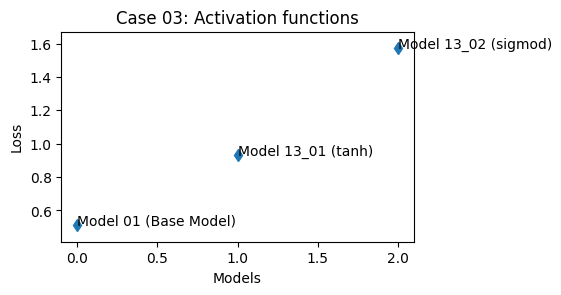

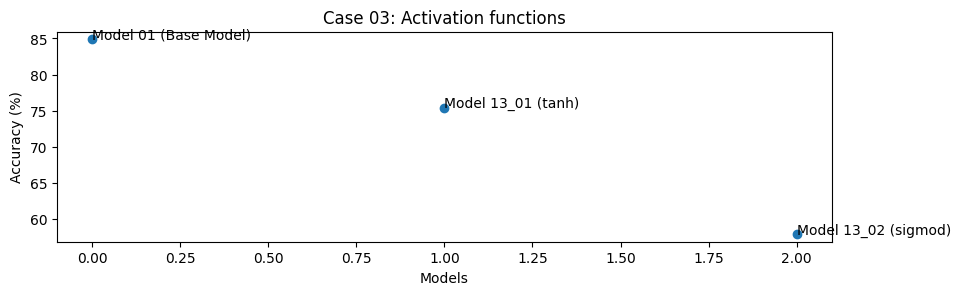

In [71]:
# Visulaize loss and accuracy of different models (Test dataset): Case wise with 10 epochs

# Case 03 --> Activation functions: 'relu' (base model), 'tanh', 'sigmod'
Case_03_labels = ['Model 01 (Base Model)', 'Model 13_01 (tanh)', 'Model 13_02 (sigmod)']
Case_03_loss = [test_loss01_01, test_loss13_01, test_loss13_02]
Case_03_accuracy = [test_accuracy01_01*100, test_accuracy13_01*100, test_accuracy13_02*100]

fig01 = plt.figure(figsize = (10, 6))
ax01 = fig01.add_subplot(2, 2, 1)
ax01.plot(Case_03_loss, 'd', label = 'Case 03 : Loss')
for i, c03 in enumerate(Case_03_labels):
    plt.text(i, Case_03_loss[i], c03)
plt.xlabel('Models')
plt.ylabel('Loss')
plt.xlim(-0.1, 2.1)
plt.ylim(min(Case_03_loss)-0.1, max(Case_03_loss)+0.1)
plt.title('Case 03: Activation functions')

fig02 = plt.figure(figsize = (10, 6))
ax02 = fig02.add_subplot(2, 1, 1)
ax02.plot(Case_03_accuracy, 'o', label = 'Case 03 : Accuracy')
for i, c03 in enumerate(Case_03_labels):
    plt.text(i, Case_03_accuracy[i], c03)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.xlim(-0.1, 2.1)
plt.ylim(min(Case_03_accuracy)-1, max(Case_03_accuracy)+1)
plt.title('Case 03: Activation functions')

In [72]:
# Hyperparameters tuning --> Case 04: Learning rates
# The base model is the model01 with 2 hidden layers with 64 and 8 neurons in each
model14_01 = Sequential()
model14_01.add(Dense(64, input_dim = 16, activation = 'relu')) # 1st layer: 16 features (number of features in the input data) and 64 neurons
model14_01.add(Dense(8, activation = 'relu')) # 2nd layer: takes these 64 outputs from the 1st layer and has 8 neurons
model14_01.add(Dense(26, activation = 'softmax')) # One output layer

In [73]:
from tensorflow.keras.optimizers import Adam

In [74]:
# Note : default learning rate is 0.001
model14_01.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.01), metrics = ['accuracy'])

In [75]:
history14_01 = model14_01.fit(x_train02_scalar, y_train02_oh, epochs = 10, batch_size = 32, validation_split = 0.2, shuffle = False)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4206 - loss: 1.9215 - val_accuracy: 0.7572 - val_loss: 0.8264
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7659 - loss: 0.7716 - val_accuracy: 0.7934 - val_loss: 0.6835
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8084 - loss: 0.6274 - val_accuracy: 0.8241 - val_loss: 0.5748
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8290 - loss: 0.5531 - val_accuracy: 0.8372 - val_loss: 0.5341
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8409 - loss: 0.5060 - val_accuracy: 0.8394 - val_loss: 0.5161
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8559 - loss: 0.4731 - val_accuracy: 0.8434 - val_loss: 0.5040
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8591 - loss: 0.4540 - val_accuracy: 0.8491 - val_loss: 0.4906
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8618 - loss: 0.4331 - val_accuracy: 0.

In [76]:
test_loss14_01, test_accuracy14_01 = model14_01.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss14_01}, Test Accuracy: {test_accuracy14_01}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8617 - loss: 0.4570
Test Loss: 0.47733938694000244, Test Accuracy: 0.8525000214576721


* Comparing the base model01 and this model14_01, the later model performs slightly better as it has lower loss and slightly higher test accuracy for the same number of epoch.

In [77]:
# Note : default learning rate is 0.001
model14_01.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.1), metrics = ['accuracy'])

In [78]:
history14_02 = model14_01.fit(x_train02_scalar, y_train02_oh, epochs = 10, batch_size = 32, validation_split = 0.2, shuffle = False)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2408 - loss: 2.8318 - val_accuracy: 0.1903 - val_loss: 2.7149
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1940 - loss: 2.7575 - val_accuracy: 0.1769 - val_loss: 2.7236
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1804 - loss: 2.7997 - val_accuracy: 0.0716 - val_loss: 3.1189
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0951 - loss: 3.0480 - val_accuracy: 0.1634 - val_loss: 2.9398
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1438 - loss: 2.9214 - val_accuracy: 0.0962 - val_loss: 3.0482
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1087 - loss: 3.0135 - val_accuracy: 0.0384 - val_loss: 3.2600
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0516 - loss: 3.2583 - val_accuracy: 0.0453 - val_loss: 3.2381
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0562 - loss: 3.2445 - val_accuracy: 0.

In [79]:
test_loss14_02, test_accuracy14_02 = model14_01.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss14_02}, Test Accuracy: {test_accuracy14_02}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0703 - loss: 3.2249
Test Loss: 3.2050037384033203, Test Accuracy: 0.06800000369548798


* Comparing the base model01 and this model14_02, the later model performs badly as it has high loss and very low test accuracy for the same number of epoch.

* Test the idea of increasing the number of epochs.

In [80]:
history14_12 = model14_01.fit(x_train02_scalar, y_train02_oh, epochs = 20, batch_size = 32, validation_split = 0.2, shuffle = False)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0565 - loss: 3.2853 - val_accuracy: 0.0359 - val_loss: 3.2690
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0420 - loss: 3.2810 - val_accuracy: 0.0359 - val_loss: 3.2690
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0420 - loss: 3.2790 - val_accuracy: 0.0359 - val_loss: 3.2689
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0418 - loss: 3.2790 - val_accuracy: 0.0359 - val_loss: 3.2689
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0418 - loss: 3.2789 - val_accuracy: 0.0359 - val_loss: 3.2689
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0418 - loss: 3.2789 - val_accuracy: 0.0359 - val_loss: 3.2689
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0418 - loss: 3.2789 - val_accuracy: 0.0359 - val_loss: 3.2689
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0418 - loss: 3.2789 - val_accuracy: 0.

In [81]:
test_loss14_12, test_accuracy14_12 = model14_01.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss14_12}, Test Accuracy: {test_accuracy14_12}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0450 - loss: 3.2712
Test Loss: 3.271944761276245, Test Accuracy: 0.04075000062584877


* Increasing the number of epochs did not improve any metrics for this model14_02.

* The learning rate considered, might be too fast for the model to 'learn' as increasing the number of epochs reduced the metrics further.

In [82]:
# Note : default learning rate is 0.001
model14_01.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics = ['accuracy'])

In [83]:
history14_03 = model14_01.fit(x_train02_scalar, y_train02_oh, epochs = 10, batch_size = 32, validation_split = 0.2, shuffle = False)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0394 - loss: 3.2722 - val_accuracy: 0.0359 - val_loss: 3.2679
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0394 - loss: 3.2710 - val_accuracy: 0.0359 - val_loss: 3.2670
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0394 - loss: 3.2699 - val_accuracy: 0.0359 - val_loss: 3.2662
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0394 - loss: 3.2688 - val_accuracy: 0.0359 - val_loss: 3.2654
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0394 - loss: 3.2679 - val_accuracy: 0.0359 - val_loss: 3.2647
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0394 - loss: 3.2671 - val_accuracy: 0.0359 - val_loss: 3.2641
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0394 - loss: 3.2663 - val_accuracy: 0.0359 - val_loss: 3.2635
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0394 - loss: 3.2655 - val_accuracy: 0.

In [84]:
test_loss14_03, test_accuracy14_03 = model14_01.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss14_03}, Test Accuracy: {test_accuracy14_03}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0450 - loss: 3.2630
Test Loss: 3.263641119003296, Test Accuracy: 0.04075000062584877


* Comparing the base model01 and this model14_03, the later model performs badly as it has high loss and very low test accuracy for the same number of epoch.

* The learning rate considered is one magnitute smaller than the base model and hence, testing the idea of increasing the number of epochs.

In [85]:
history14_13 = model14_01.fit(x_train02_scalar, y_train02_oh, epochs = 30, batch_size = 32, validation_split = 0.2, shuffle = False)

Epoch 1/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0394 - loss: 3.2637 - val_accuracy: 0.0359 - val_loss: 3.2617
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0394 - loss: 3.2632 - val_accuracy: 0.0359 - val_loss: 3.2614
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0394 - loss: 3.2627 - val_accuracy: 0.0359 - val_loss: 3.2611
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0394 - loss: 3.2622 - val_accuracy: 0.0359 - val_loss: 3.2608
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0394 - loss: 3.2618 - val_accuracy: 0.0359 - val_loss: 3.2605
Epoch 6/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0394 - loss: 3.2615 - val_accuracy: 0.0359 - val_loss: 3.2603
Epoch 7/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0394 - loss: 3.2611 - val_accuracy: 0.0359 - val_loss: 3.2601
Epoch 8/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0394 - loss: 3.2608 - val_accuracy: 0.

In [86]:
test_loss14_04, test_accuracy14_04 = model14_01.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss14_04}, Test Accuracy: {test_accuracy14_04}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0450 - loss: 3.2577
Test Loss: 3.2582476139068604, Test Accuracy: 0.04075000062584877


* Increasing the number of epochs improved the accuracy only slightly, the choosen learning rate is too small and so this model14_04 'slow' to 'learn'.

* Overall, compared to the base model01 with default learning rate of 0.001, model14_01 with 'faster' learning rate of 0.01, performs at par in comparision and also computationally less expensive. Hence, model14_01 is a better model.

Text(0.5, 1.0, 'Case 04: Learning rates [0.1, 0.01, 0.001, 0.0001]')

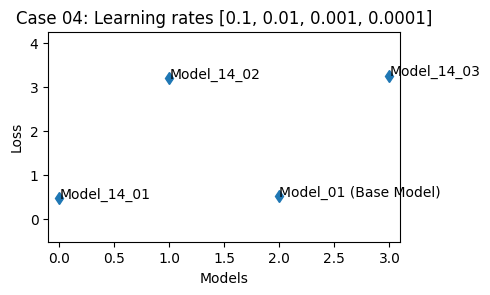

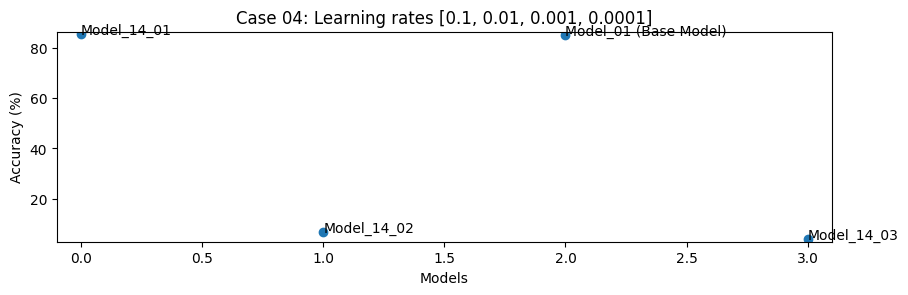

In [87]:
# Visulaize loss and accuracy of different models (Test datasets): Case wise with 10 epochs
# Case 04 --> Learning rates: [0.1, 0.01, 0.001 (base model), 0.0001]
Case_04_labels = ['Model_14_01', 'Model_14_02', 'Model_01 (Base Model)', 'Model_14_03']
Case_04_loss = [test_loss14_01, test_loss14_02, test_loss01_01, test_loss14_03]
Case_04_accuracy = [test_accuracy14_01*100, test_accuracy14_02*100, test_accuracy01_01*100, test_accuracy14_03*100]

fig01 = plt.figure(figsize = (10, 6))
ax01 = fig01.add_subplot(2, 2, 1)
ax01.plot(Case_04_loss, 'd', label = 'Case 04 : Loss')
for i, c04 in enumerate(Case_04_labels):
    plt.text(i, Case_04_loss[i], c04)
plt.xlabel('Models')
plt.ylabel('Loss')
plt.xlim(-0.1, 3.1)
plt.ylim(min(Case_04_loss)-1, max(Case_04_loss)+1)
plt.title('Case 04: Learning rates [0.1, 0.01, 0.001, 0.0001]')

fig02 = plt.figure(figsize = (10, 6))
ax02 = fig02.add_subplot(2, 1, 1)
ax02.plot(Case_04_accuracy, 'o', label = 'Case 04 : Accuracy')
for i, c04 in enumerate(Case_04_labels):
    plt.text(i, Case_04_accuracy[i], c04)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.xlim(-0.1, 3.1)
plt.ylim(min(Case_04_accuracy)-1, max(Case_04_accuracy)+1)
plt.title('Case 04: Learning rates [0.1, 0.01, 0.001, 0.0001]')

In [88]:
from sklearn.metrics import confusion_matrix, classification_report

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           A       0.95      0.93      0.94       149
           B       0.80      0.86      0.83       153
           C       0.90      0.88      0.89       137
           D       0.80      0.88      0.84       156
           E       0.86      0.93      0.89       141
           F       0.87      0.85      0.86       140
           G       0.89      0.79      0.84       160
           H       0.81      0.69      0.75       144
           I       0.87      0.88      0.88       146
           J       0.91      0.85      0.88       149
           K       0.81      0.79      0.80       130
           L       0.86      0.90      0.88       155
           M       0.93      0.92      0.93       168
           N       0.87      0.88      0.88       151
           O       0.81      0.90      0.85       145
           P       0.89      0.87      0.88       173
           Q       0.93      0.86      0

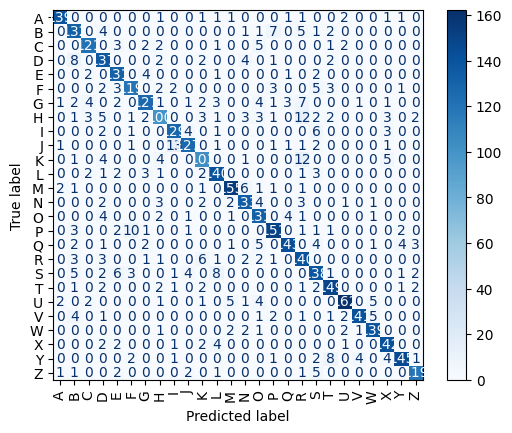

In [89]:
# Get model predictions
y_pred_01 = model01.predict(x_test02_scalar) # Use the scaled test data!
y_pred_01_indices = np.argmax(y_pred_01, axis=1)
y_pred_01_original = label_encoder.inverse_transform(y_pred_01_indices)

# Get true labels - USE THE ORIGINAL y_test02 FROM THE SPLIT. This is safest.
y_true_original = y_test02.values

# Generate the performance report
print(classification_report(y_true_original, y_pred_01_original))

# Optional: Also generate and plot the confusion matrix for a visual inspection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true_original, y_pred_01_original)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=90)
plt.show()

* The model01 predicts only a few letters and the remaining ones are sparse:
  * This may indicate that this model does not generalizes well or
  * Severe imbalance in the training data, this can be checked by looking at the count of each letter or
  * Data Preprocessing / Feature Scaling Bug (Fixed this bug by changing fit_transform(x_data) to transform(x_data)

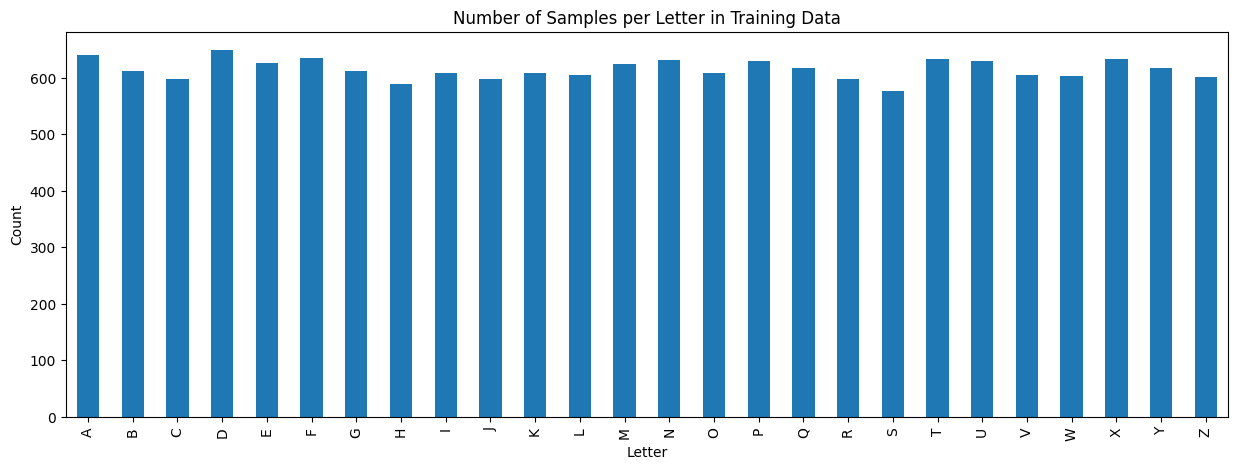

In [90]:
# Check for train data imbalance
plt.figure(figsize=(15, 5))
train_letter_counts = pd.Series(y_train02).value_counts().sort_index()
train_letter_counts.plot(kind='bar')
plt.title("Number of Samples per Letter in Training Data")
plt.xlabel("Letter")
plt.ylabel("Count")
plt.show()

* The training dataset is pretty evenly balanced, and hence the assumption of training data being inbalance can be ruled out.

In [91]:
print("Training Data - Feature-wise Mean:", x_train02_scalar.mean(axis=0))
print("Training Data - Feature-wise Std: ", x_train02_scalar.std(axis=0))
print("\nTest Data - Feature-wise Mean:", x_test02_scalar.mean(axis=0))
print("Test Data - Feature-wise Std: ", x_test02_scalar.std(axis=0))

Training Data - Feature-wise Mean: [ 1.31672451e-16 -1.48991930e-16  6.66133815e-17 -7.19424520e-17
 -3.33066907e-17  1.66089364e-16  6.30606678e-17 -3.19744231e-17
 -1.23900890e-16  2.59792188e-16  5.10702591e-17  1.37445610e-16
  1.10134124e-16 -1.45217172e-16  5.32907052e-18 -1.31450406e-16]
Training Data - Feature-wise Std:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Test Data - Feature-wise Mean: [-2.97500662e-03 -1.00273067e-02  1.48785869e-03 -1.01768772e-02
 -9.13255249e-04 -6.15558612e-05  1.30600251e-02 -1.19195508e-02
 -3.08396458e-03 -1.08124176e-02  8.80589063e-03 -1.05014450e-03
  1.42040245e-03  1.40936656e-02  1.58319599e-03 -4.02013204e-03]
Test Data - Feature-wise Std:  [1.00366118 1.00146249 0.99553349 0.98924928 1.00099211 0.98839547
 0.998848   0.97951911 0.97754951 0.99404708 1.00930458 0.99403325
 1.00085008 1.01100885 1.00193885 1.00174664]


* The training dataset has mean close to zero and the standard deviation equal to one, as expected. However, the test dataset mean is not close to zero the std is not exactly one.
* This means there is some issue to scaling the test dataset.

**Diagnostic 1: Inspect the RAW Training Labels**

To rule out the possibility that the training data is corrupted. Let's check the distribution of the original string labels before any encoding happens.

In [92]:
# This checks the raw, original string labels in your TRAINING set
from collections import Counter

# y_train02 is from your train-test split. It should be a Series of strings like 'A', 'B', 'C'...
train_label_counts = Counter(y_train02)
print("Count of each letter in the TRAINING set:")
# Sort the output for readability
for letter, count in sorted(train_label_counts.items()):
    print(f"'{letter}': {count}")

# Let's also see the total number of training samples
print(f"\nTotal training samples: {len(y_train02)}")

Count of each letter in the TRAINING set:
'A': 640
'B': 613
'C': 599
'D': 649
'E': 627
'F': 635
'G': 613
'H': 590
'I': 609
'J': 598
'K': 609
'L': 606
'M': 624
'N': 632
'O': 608
'P': 630
'Q': 617
'R': 598
'S': 577
'T': 633
'U': 630
'V': 606
'W': 604
'X': 633
'Y': 618
'Z': 602

Total training samples: 16000


* The letters are evenly distributed, so no problem in the main data

**Diagnostic 2: sanity Check with a Dummy Classifier**

* Using a simple, rule-based model to determine if the problem is with the data or with the neural network

In [93]:
from sklearn.dummy import DummyClassifier

# Create a dummy classifier that always predicts the most frequent class
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train02_scalar, y_train02_encoded) # Train it on our data

# Make predictions
dummy_pred_encoded = dummy_clf.predict(x_test02_scalar)
dummy_pred_original = label_encoder.inverse_transform(dummy_pred_encoded)

# Check the "accuracy" of this stupid strategy
from sklearn.metrics import accuracy_score
dummy_accuracy = accuracy_score(y_test02_encoded, dummy_pred_encoded)
print(f"Dummy classifier accuracy: {dummy_accuracy:.2%}")

# Let's see what letter it's predicting
most_frequent_letter = dummy_pred_original[0]
print(f"The dummy classifier always predicts: '{most_frequent_letter}'")

Dummy classifier accuracy: 3.90%
The dummy classifier always predicts: 'D'


* The problem is not with the datset as no single or a few letters with very high accuracy.

**Diagnostic 3: Check for Predictable Failure**

* To check what the model is actucally confident about

In [94]:
# Get the predicted probabilities for the first 20 test samples
pred_probs = model01.predict(x_test02_scalar[:20])
# Get the top prediction and its confidence for each sample
for i, probs in enumerate(pred_probs):
    predicted_index = np.argmax(probs)
    predicted_letter = label_encoder.inverse_transform([predicted_index])[0]
    confidence = np.max(probs)
    true_letter = y_test02.iloc[i] # Get the true label from the original Series

    print(f"Sample {i}: True='{true_letter}', Pred='{predicted_letter}', Confidence={confidence:.2%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Sample 0: True='T', Pred='Z', Confidence=95.85%
Sample 1: True='L', Pred='L', Confidence=87.92%
Sample 2: True='A', Pred='A', Confidence=100.00%
Sample 3: True='E', Pred='E', Confidence=93.88%
Sample 4: True='Q', Pred='Q', Confidence=95.93%
Sample 5: True='E', Pred='E', Confidence=99.62%
Sample 6: True='O', Pred='O', Confidence=99.83%
Sample 7: True='Q', Pred='Q', Confidence=99.97%
Sample 8: True='G', Pred='G', Confidence=66.15%
Sample 9: True='O', Pred='O', Confidence=99.78%
Sample 10: True='B', Pred='B', Confidence=91.32%
Sample 11: True='P', Pred='P', Confidence=99.96%
Sample 12: True='V', Pred='V', Confidence=97.84%
Sample 13: True='Q', Pred='Q', Confidence=94.65%
Sample 14: True='M', Pred='M', Confidence=83.96%
Sample 15: True='V', Pred='V', Confidence=98.41%
Sample 16: True='B', Pred='B', Confidence=97.57%
Sample 17: True='K', Pred='H', Confidence=48.08%
Sample 18: True='S', Pred='D', Confidence=37.49%
Sample 19: True='D', Pred='D', Confidenc

* It can be noticed that a few letters have low confidence like 'L' vs 'L', 'Q' vs 'G', 'S' vs 'F', 'D' vs 'D', 'K' vs 'K'.
* Based on these diagonistic results, the dataset is not a problem but model training is.
* The model01 is predicting mainly two letters because it is overfitting and memorizing without learning to generalize.
* This model also suffers from not able to predict certian letters resulting in more brittle like form as even the diagonal letter combination in the confusion matrix are not predicted correctly. This could be a reason for having high accuracy and low precision, 'brittle' model.
* These letter combinations mentioned earlier indicates that this model01 gets confused between them.

* Ideas to explore to mitigate overfitting problem: Dropout layers and L2 regularization.
  * Dropout: Forces 'team' work by forcing a few neurons to turn off thereby reducing over dependency on only a few neurons to perform. It also forces multiple neurons to learn and so multiple ways to learn too, hence these new pathways may help model become more confident in predicting tricky pairs like mentioned in the above pointers.
  * L2 regularization: Adds a penalty to the loss function, the larger the weights, larger is the penalty. So, the model does not learn overly from complex and brittle rules. This feature will force the model to find more balance solution.
  * EarlyStopping: To avoid model from training for too many epochs by using a callback to stop the training once performance on validation stops improving.

In [95]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [96]:
model01_11 = Sequential()
model01_11.add(Dense(64, input_dim = 16, activation = 'relu')) # 1st layer: 16 features (number of features in the input data) and 64 neurons
model01_11.add(Dropout(0.5)) # Randomly drop 50% of neurons in this layer during training
model01_11.add(Dense(8, activation = 'relu', kernel_regularizer = l2(0.01))) # 2nd layer: takes 64 outputs from the 1st layer and has 8 neuronsand Penalize large weights
model01_11.add(Dropout(0.5)) # Randomly drop 50% of neurons in this layer during training
model01_11.add(Dense(26, activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
model01_11.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [98]:
# Define the early stopping callback
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
# patience=5 means it will wait 5 epochs after seeing no improvement before stopping
history01_11 = model01_11.fit(x_train02_scalar, y_train02_oh, epochs = 100, batch_size = 32, validation_split = 0.2, callbacks = [early_stop], shuffle = False)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0585 - loss: 3.3404 - val_accuracy: 0.3031 - val_loss: 2.8969
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1347 - loss: 2.9803 - val_accuracy: 0.3913 - val_loss: 2.5045
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1668 - loss: 2.7501 - val_accuracy: 0.4556 - val_loss: 2.2650
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1870 - loss: 2.6124 - val_accuracy: 0.4700 - val_loss: 2.1238
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2168 - loss: 2.5101 - val_accuracy: 0.5078 - val_loss: 2.0326
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2242 - loss: 2.4734 - val_accuracy: 0.5506 - val_loss: 1.9445
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2240 - loss: 2.4413 - val_accuracy: 0.5647 - val_loss: 1.8935
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2437 - loss: 2.4154 - val_accu

In [99]:
test_loss01_11, test_accuracy01_11 = model01_11.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss01_11}, Test Accuracy: {test_accuracy01_11}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6812 - loss: 1.4436
Test Loss: 1.445061206817627, Test Accuracy: 0.6752499938011169


* After applying regulaizations to model01, the overfitting problem is resolved.
* However, the train accuracy < than test accuracy, this is a classic case of underfitting.
* The regularizations applied, Dropout and L2, is too strong and this is preventing the model from learning using the training dataset.
* Now, tuning these hyperparameters is a way forward

In [100]:
model01_12 = Sequential()
model01_12.add(Dense(64, input_dim = 16, activation = 'relu')) # 1st layer: 16 features (number of features in the input data) and 64 neurons
model01_12.add(Dropout(0.5)) # Retaining the same dropout as in the case of model01_11
model01_12.add(Dense(8, activation = 'relu', kernel_regularizer = l2(0.001))) # 2nd layer: takes 64 outputs from the 1st layer and has 8 neuronsand Penalize large weights
# Reduced l2 penalty from 0.01 to 0.001
model01_12.add(Dropout(0.5)) # Randomly drop 50% of neurons in this layer during training
model01_12.add(Dense(26, activation = 'softmax'))

In [101]:
model01_12.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [102]:
# Define the early stopping callback
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
# patience=5 means it will wait 5 epochs after seeing no improvement before stopping
history01_12 = model01_12.fit(x_train02_scalar, y_train02_oh, epochs = 100, batch_size = 32, validation_split = 0.2, callbacks = [early_stop], shuffle = False)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0468 - loss: 3.2845 - val_accuracy: 0.1928 - val_loss: 2.9291
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1139 - loss: 2.9706 - val_accuracy: 0.3250 - val_loss: 2.4643
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1524 - loss: 2.7277 - val_accuracy: 0.4025 - val_loss: 2.2443
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1709 - loss: 2.6051 - val_accuracy: 0.4456 - val_loss: 2.1024
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1817 - loss: 2.5308 - val_accuracy: 0.4991 - val_loss: 2.0124
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1994 - loss: 2.4796 - val_accuracy: 0.5369 - val_loss: 1.9364
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2155 - loss: 2.4295 - val_accuracy: 0.5688 - val_loss: 1.8806
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2278 - loss: 2.4025 - val_accu

In [103]:
test_loss01_12, test_accuracy01_12 = model01_12.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss01_12}, Test Accuracy: {test_accuracy01_12}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6853 - loss: 1.3911
Test Loss: 1.3931806087493896, Test Accuracy: 0.6740000247955322


* The effect of lowering the L2 regulation is marginal.
* The problem of severe underfitting still remains.

In [104]:
model01_13 = Sequential()
model01_13.add(Dense(64, input_dim = 16, activation = 'relu')) # 1st layer: 16 features (number of features in the input data) and 64 neurons
model01_13.add(Dropout(0.2)) # Reducing the dropout from 0.5 to 0.2
model01_13.add( Dense(8, activation = 'relu', kernel_regularizer = l2(0.001))) # 2nd layer: takes 64 outputs from the 1st layer and has 8 neuronsand Penalize large weights
# Reduced l2 penalty from 0.01 to 0.001
model01_13.add(Dropout(0.2)) # Reducing the dropout from 0.5 to 0.2
model01_13.add(Dense(26, activation = 'softmax'))

In [105]:
model01_13.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [106]:
# Define the early stopping callback
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
# patience=5 means it will wait 5 epochs after seeing no improvement before stopping
history01_13 = model01_13.fit(x_train02_scalar, y_train02_oh, epochs = 100, batch_size = 32, validation_split = 0.2, callbacks = [early_stop], shuffle = False)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1019 - loss: 3.0628 - val_accuracy: 0.4034 - val_loss: 2.1626
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3270 - loss: 2.2231 - val_accuracy: 0.5725 - val_loss: 1.6145
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4028 - loss: 1.9160 - val_accuracy: 0.6319 - val_loss: 1.4167
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4323 - loss: 1.7847 - val_accuracy: 0.6612 - val_loss: 1.3234
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4529 - loss: 1.7227 - val_accuracy: 0.6703 - val_loss: 1.2601
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4605 - loss: 1.6594 - val_accuracy: 0.6809 - val_loss: 1.2085
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4827 - loss: 1.6256 - val_accuracy: 0.6913 - val_loss: 1.1766
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4840 - loss: 1.6014 - val_accu

In [107]:
test_loss01_13, test_accuracy01_13 = model01_13.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss01_13}, Test Accuracy: {test_accuracy01_13}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8371 - loss: 0.6833
Test Loss: 0.6997384428977966, Test Accuracy: 0.8324999809265137


* After fine tuning Dropout hyperparameter, the train accuracy has increased.
* But, validation accuracy > train accuracy and therefore underfitting problem still persists and more tuning is required.
* The difference between test and validation accuracy is not very high, so it can be considered as statistical variation.

In [108]:
model01_14 = Sequential()
model01_14.add(Dense(64, input_dim = 16, activation = 'relu')) # 1st layer: 16 features (number of features in the input data) and 64 neurons
model01_14.add(Dropout(0.1)) # Reducing the dropout from 0.2 to 0.1
model01_14.add( Dense(8, activation = 'relu', kernel_regularizer = l2(0.001))) # 2nd layer: takes 64 outputs from the 1st layer and has 8 neuronsand Penalize large weights
# Reduced l2 penalty from 0.01 to 0.001
model01_14.add(Dropout(0.1)) # Reducing the dropout from 0.2 to 0.1
model01_14.add(Dense(26, activation = 'softmax'))

In [109]:
model01_14.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [110]:
# Define the early stopping callback
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
# patience=5 means it will wait 5 epochs after seeing no improvement before stopping
history01_14 = model01_14.fit(x_train02_scalar, y_train02_oh, epochs = 100, batch_size = 32, validation_split = 0.2, callbacks = [early_stop], shuffle = False)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1068 - loss: 3.0191 - val_accuracy: 0.3659 - val_loss: 2.1670
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3623 - loss: 2.1039 - val_accuracy: 0.5731 - val_loss: 1.5616
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4789 - loss: 1.7170 - val_accuracy: 0.6503 - val_loss: 1.3073
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5286 - loss: 1.5193 - val_accuracy: 0.6919 - val_loss: 1.1854
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5561 - loss: 1.4389 - val_accuracy: 0.7125 - val_loss: 1.1180
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5708 - loss: 1.3840 - val_accuracy: 0.7287 - val_loss: 1.0716
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5861 - loss: 1.3398 - val_accuracy: 0.7444 - val_loss: 1.0293
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6118 - loss: 1.2929 - val_accu

In [111]:
test_loss01_14, test_accuracy01_14 = model01_14.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss01_14}, Test Accuracy: {test_accuracy01_14}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8621 - loss: 0.5463
Test Loss: 0.5560280680656433, Test Accuracy: 0.8552500009536743


* The reduction is Dropout has helped to increase the train accuracy and reduce the gap between validation and train accuracy.
* Since, train accuracy < validation accuracy - the model is still underfitting.
* More fine tuning of hyperparameter is required.

In [112]:
model01_15 = Sequential()
model01_15.add(Dense(64, input_dim = 16, activation = 'relu')) # 1st layer: 16 features (number of features in the input data) and 64 neurons
model01_15.add(Dropout(0.1)) # Retaining the dropout at 0.1
model01_15.add( Dense(8, activation = 'relu', kernel_regularizer = l2(0.0005))) # 2nd layer: takes 64 outputs from the 1st layer and has 8 neuronsand Penalize large weights
# Reduced l2 penalty from 0.001 to 0.0005 (lambda)
model01_15.add(Dropout(0.1)) # Retaining the dropout at 0.1
model01_15.add(Dense(26, activation = 'softmax'))

In [113]:
model01_15.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [114]:
# Define the early stopping callback
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
# patience=5 means it will wait 5 epochs after seeing no improvement before stopping
history01_15 = model01_15.fit(x_train02_scalar, y_train02_oh, epochs = 100, batch_size = 32, validation_split = 0.2, callbacks = [early_stop], shuffle = False)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1292 - loss: 3.0347 - val_accuracy: 0.3969 - val_loss: 2.1490
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3760 - loss: 2.0920 - val_accuracy: 0.5744 - val_loss: 1.5582
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4833 - loss: 1.7108 - val_accuracy: 0.6444 - val_loss: 1.3117
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5248 - loss: 1.5489 - val_accuracy: 0.6684 - val_loss: 1.1812
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5517 - loss: 1.4452 - val_accuracy: 0.6934 - val_loss: 1.0983
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5754 - loss: 1.3743 - val_accuracy: 0.7128 - val_loss: 1.0396
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6004 - loss: 1.3092 - val_accuracy: 0.7334 - val_loss: 0.9898
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6125 - loss: 1.2751 - val_accu

In [115]:
test_loss01_15, test_accuracy01_15 = model01_15.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss01_15}, Test Accuracy: {test_accuracy01_15}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8609 - loss: 0.5444
Test Loss: 0.5527992844581604, Test Accuracy: 0.8527500033378601


* The gap between train accuracy and validation accuracy is reducing, but, still is significant.
* More fine tuning is required
* Testing the removal of L2 regularization

In [116]:
model01_16 = Sequential()
model01_16.add(Dense(64, input_dim = 16, activation = 'relu')) # 1st layer: 16 features (number of features in the input data) and 64 neurons
model01_16.add(Dropout(0.1)) # Retaining the dropout at 0.1
model01_16.add(Dense(8, activation = 'relu')) # 2nd layer: takes 64 outputs from the 1st layer and has 8 neurons
model01_16.add(Dropout(0.1)) # Retaining the dropout at 0.1
model01_16.add(Dense(26, activation = 'softmax'))

In [117]:
model01_16.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Define the early stopping callback
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
# patience=5 means it will wait 5 epochs after seeing no improvement before stopping
history01_16 = model01_16.fit(x_train02_scalar, y_train02_oh, epochs = 100, batch_size = 32, validation_split = 0.2, callbacks = [early_stop], shuffle = False)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1285 - loss: 2.9334 - val_accuracy: 0.4775 - val_loss: 1.8464
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4201 - loss: 1.8773 - val_accuracy: 0.6356 - val_loss: 1.3773
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5097 - loss: 1.5903 - val_accuracy: 0.6706 - val_loss: 1.2105
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5438 - loss: 1.4635 - val_accuracy: 0.6897 - val_loss: 1.1081
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5633 - loss: 1.3910 - val_accuracy: 0.7013 - val_loss: 1.0454
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5894 - loss: 1.3095 - val_accuracy: 0.7153 - val_loss: 0.9977
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5951 - loss: 1.2770 - val_accuracy: 0.7272 - val_loss: 0.9545
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6089 - loss: 1.2481 - val_accu

In [ ]:
test_loss01_16, test_accuracy01_16 = model01_16.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss01_16}, Test Accuracy: {test_accuracy01_16}')

* The model appears to have reached its maximum performance.
* The removal of L2 regularization has little impact on the measured metrics suggests that more complex model is required.
* Based on the case studies performed earlier, model12_01 and model12_02 with increased number of neurons in the 1st hidden layer have better metrics like lower loss and higher accuracy.
* Another model, that has comparable metrics to that of base model is model11 with 3 hidden layers of 64, 32 and 16 neurons each.

In [ ]:
# Get model predictions
y_pred_12_01 = model12_01.predict(x_test02_scalar) # Use the scaled test data!
y_pred_12_01_indices = np.argmax(y_pred_12_01, axis=1)
y_pred_12_01_original = label_encoder.inverse_transform(y_pred_12_01_indices)

# Get true labels - USE THE ORIGINAL y_test02 FROM THE SPLIT. This is safest.
y_true_original = y_test02.values

# Generate the performance report
print(classification_report(y_true_original, y_pred_12_01_original))

# Generate and plot the confusion matrix for a visual inspection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true_original, y_pred_12_01_original)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=90)
plt.show()

* The measured confusion matrix lookes simular to the base model and hence suffers from similar issues such as unable to generalize.

In [ ]:
# Get model predictions
y_pred_12_02 = model12_02.predict(x_test02_scalar) # Use the scaled test data!
y_pred_12_02_indices = np.argmax(y_pred_12_02, axis=1)
y_pred_12_02_original = label_encoder.inverse_transform(y_pred_12_02_indices)

# Get true labels - USE THE ORIGINAL y_test02 FROM THE SPLIT. This is safest.
y_true_original = y_test02.values

# Generate the performance report
print(classification_report(y_true_original, y_pred_12_02_original))

# Optional: Also generate and plot the confusion matrix for a visual inspection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true_original, y_pred_12_02_original)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=90)
plt.show()

In [ ]:
# Get model predictions
y_pred_11 = model11.predict(x_test02_scalar) # Use the scaled test data!
y_pred_11_indices = np.argmax(y_pred_11, axis=1)
y_pred_11_original = label_encoder.inverse_transform(y_pred_11_indices)

# Get true labels - USE THE ORIGINAL y_test02 FROM THE SPLIT. This is safest.
y_true_original = y_test02.values

# Generate the performance report
print(classification_report(y_true_original, y_pred_11_original))

# Generate and plot the confusion matrix for a visual inspection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true_original, y_pred_11_original)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=90)
plt.show()

* All the 4 models, do not suffer from similar generalization issues as the base model
  * model01 with 2 hidden layers of 64 and 16 neurons each (base model)
  * model12_01 with 2 hidden layers of 128 and 64 neurons each (Best model)
  * model12_02 with 2 hidden layers of 128 and 32 neurons each (2nd Best)
  * model11 with 3 hidden layers of 64, 32 and 16 neurons each (3rd Best)
* Based on the Diagnostic study presented above, it is clear that model training is the issue for low predictability in the case of base model.
* The case study of introducing regulations like Dropout and L2 regularization combined with Earlystop, indicated that L2 regularization did not have much impact to improve the model performance.
* Experimenting how these (top 3) models (with different architectures) can be trained further to improve their performance based on the measured metrics, using the knowledge of base model.

In [ ]:
model12_11 = Sequential()
model12_11.add(Dense(128, input_dim = 16, activation = 'relu')) # 1st layer: 16 features (number of features in the input data) and 128 neurons
model12_11.add(Dropout(0.1)) # Retaining the dropout at 0.1
model12_11.add(Dense(64, activation = 'relu')) # 2nd layer: takes 128 outputs from the 1st layer and has 64 neurons
model12_11.add(Dropout(0.1)) # Retaining the dropout at 0.1
model12_11.add(Dense(26, activation = 'softmax'))

In [ ]:
model12_12 = Sequential()
model12_12.add(Dense(128, input_dim = 16, activation = 'relu')) # 1st layer: 16 features (number of features in the input data) and 128 neurons
model12_12.add(Dropout(0.1)) # Retaining the dropout at 0.1
model12_12.add(Dense(32, activation = 'relu')) # 2nd layer: takes 128 outputs from the 1st layer and has 32 neurons
model12_12.add(Dropout(0.1)) # Retaining the dropout at 0.1
model12_12.add(Dense(26, activation = 'softmax'))

In [ ]:
model11_01 = Sequential()
model11_01.add(Dense(64, input_dim = 16, activation = 'relu')) # 1st layer: 16 features (number of features in the input data) and 64 neurons
model11_01.add(Dropout(0.1)) # Retaining the dropout at 0.1
model11_01.add(Dense(32, activation = 'relu')) # 2nd layer: takes 64 outputs from the 1st layer and has 32 neurons
model11_01.add(Dropout(0.1)) # Retaining the dropout at 0.1
model11_01.add(Dense(16, activation = 'relu')) # 3rd layer: takes 32 outputs from the 2nd layer and has 16 neurons
model11_01.add(Dropout(0.1)) # Retaining the dropout at 0.1
model11_01.add(Dense(26, activation = 'softmax'))

In [ ]:
model12_11.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model12_12.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model11_01.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history12_11 = model12_11.fit(x_train02_scalar, y_train02_oh, epochs = 100, batch_size = 32, validation_split = 0.2, callbacks=[early_stop], shuffle = False)

In [ ]:
test_loss12_11, test_accuracy12_11 = model12_11.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss12_11}, Test Accuracy: {test_accuracy12_11}')

In [ ]:
history12_12 = model12_12.fit(x_train02_scalar, y_train02_oh, epochs = 100, batch_size = 32, validation_split = 0.2, callbacks=[early_stop], shuffle = False)

In [ ]:
test_loss12_12, test_accuracy12_12 = model12_12.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss12_12}, Test Accuracy: {test_accuracy12_12}')

In [ ]:
history11_01 = model11_01.fit(x_train02_scalar, y_train02_oh, epochs = 100, batch_size = 32, validation_split = 0.2, callbacks=[early_stop], shuffle = False)

In [ ]:
test_loss11_01, test_accuracy11_01 = model11_01.evaluate(x_test02_scalar, y_test02_oh)
print(f'Test Loss: {test_loss11_01}, Test Accuracy: {test_accuracy11_01}')

* Based on the train, test and validation accuracy, it is evident that the model12_11 is the best among 4 models considered.
* The accuracies of train, trst and validation datasets are inthe same ball park, indicating this model is capable of generalizing well.
* The regulaization methods like Dropout and Earlystop have helped increase the performaces of all the three models.

In [ ]:
# Get model predictions
y_pred_12_11 = model12_11.predict(x_test02_scalar) # Make sure to use the scaled test data!
y_pred_12_11_indices = np.argmax(y_pred_12_11, axis=1)
y_pred_12_11_original = label_encoder.inverse_transform(y_pred_12_11_indices)

# Get true labels - USE THE ORIGINAL y_test02 FROM THE SPLIT. This is safest.
y_true_original = y_test02.values

# Generate the performance report
print(classification_report(y_true_original, y_pred_12_11_original))

# Generate and plot the confusion matrix for a visual inspection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true_original, y_pred_12_11_original)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = label_encoder.classes_)
disp.plot(cmap = 'Blues', xticks_rotation = 90)
plt.show()

In [ ]:
# Get model predictions
y_pred_12_12 = model12_12.predict(x_test02_scalar) # Make sure to use the scaled test data!
y_pred_12_12_indices = np.argmax(y_pred_12_12, axis=1)
y_pred_12_12_original = label_encoder.inverse_transform(y_pred_12_12_indices)

# Get true labels - USE THE ORIGINAL y_test02 FROM THE SPLIT. This is safest.
y_true_original = y_test02.values

# Generate the performance report
print(classification_report(y_true_original, y_pred_12_12_original))

# Generate and plot the confusion matrix for a visual inspection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true_original, y_pred_12_12_original)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = label_encoder.classes_)
disp.plot(cmap = 'Blues', xticks_rotation = 90)
plt.show()

In [ ]:
# Get model predictions
y_pred_11_01 = model11_01.predict(x_test02_scalar) # Make sure to use the scaled test data!
y_pred_11_01_indices = np.argmax(y_pred_11_01, axis=1)
y_pred_11_01_original = label_encoder.inverse_transform(y_pred_11_01_indices)

# Get true labels - USE THE ORIGINAL y_test02 FROM THE SPLIT. This is safest.
y_true_original = y_test02.values

# Generate the performance report
print(classification_report(y_true_original, y_pred_11_01_original))

# Generate and plot the confusion matrix for a visual inspection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true_original, y_pred_11_01_original)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = label_encoder.classes_)
disp.plot(cmap = 'Blues', xticks_rotation = 90)
plt.show()